In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances

%matplotlib inline

In [3]:
df = pd.read_csv("datakind_extract_keyfields.csv", low_memory=False)

In [4]:
df.head()

,org,city,state,country,org_type,org_subtype,budget,reg date,contact,role,order_num,transaction_date,vendor,item,licenses,revenue,value
0,100118,"Toledo,",OH,US,5,160,80000,2002-06-20 11:59:29.967,28892,26,6666,2002-06-20 00:00:00.0,3882,11951053,1,60,579
1,100118,"Toledo,",OH,US,5,160,80000,2002-06-20 11:59:29.967,28892,26,6666,2002-06-20 00:00:00.0,3882,11951054,1,60,319
2,100118,"Toledo,",OH,US,5,160,80000,2002-06-20 11:59:29.967,28892,26,624070,2011-08-26 00:00:00.0,3882,45200711,1,31,765
3,100118,"Toledo,",OH,US,5,160,80000,2002-06-20 11:59:29.967,28892,26,624070,2011-08-26 00:00:00.0,3882,11951394,3,69,1731
4,100118,"Toledo,",OH,US,5,160,80000,2002-06-20 11:59:29.967,28892,26,624070,2011-08-26 00:00:00.0,3882,45200669,2,48,1176


# Filter by year

In [5]:
df['reg date'] = pd.to_datetime(df['reg date'], format='%Y-%m-%d %H:%M:%S.%f')
soup = df[df['reg date'].apply(lambda x: x.year).isin([2012, 2013, 2014])]

# Convert long to wide dataframe

In [6]:
soup_group = pd.crosstab(soup.org, soup.item)

In [7]:
soup_group.head()

item,11950880,11950902,11950912,11951016,11951055,11951057,11951146,11951185,11951230,11951248,...,101384637,101664400,101769558,101769573,101769588,101769603,101769618,102373968,102440866,102440884
org,,,,,,,,,,,,,,,,,,,,,
649419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
649421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
649423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
649428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
649433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Most orgs have bought less than 15 items between 2012-2014

In [32]:
total_org_purchases = soup_group.sum(axis=1)

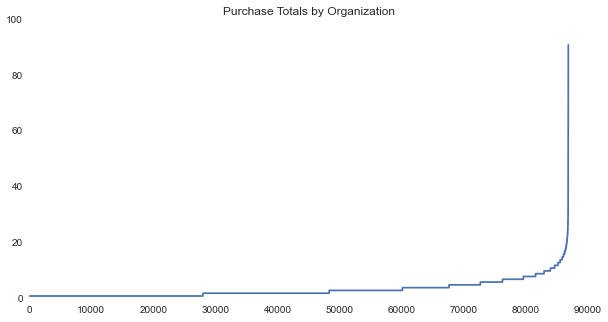

In [33]:
plt.figure(figsize=(10,5))
plt.plot(sorted(total_org_purchases))
plt.title("Purchase Totals by Organization")
plt.show()

# Log transform counts in org by item dataframe

In [34]:
soup_group_log = np.log(soup_group + 1)

In [35]:
soup_group_log.head()

item,11950880,11950902,11950912,11951016,11951055,11951057,11951146,11951185,11951230,11951248,...,101384637,101664400,101769558,101769573,101769588,101769603,101769618,102373968,102440866,102440884
org,,,,,,,,,,,,,,,,,,,,,
649419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
649421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
649423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
649428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
649433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Distance function for org_id=649419

This is slow. Todo: make faster using numpy arrays

Look for orgs similar to org_id=649419

In [36]:
def calc_distance(df, org_id):
    rows = soup_group_log.index

    dist_euc = []
    dist_man = []
    
    for x in rows:
        dist_euc.append([x, float(euclidean_distances(df.loc[org_id], df.loc[x]))])
        dist_man.append([x, float(manhattan_distances(df.loc[org_id], df.loc[x]))])
    
    return dist_euc, dist_man

In [37]:
dist_euc, dist_man = calc_distance(df=soup_group_log, org_id=649419)

# Return top 100 similar orgs by distance measure

In [60]:
dist_euc_sort = sorted(dist_euc, key=lambda x: x[1])[1:101] # first value is comparison to self

# show top 10
dist_euc_sort[:10]

[[660324, 0.9802581434685472],
 [668958, 0.9802581434685472],
 [721071, 0.9802581434685472],
 [726192, 0.9802581434685472],
 [753619, 0.9802581434685472],
 [756159, 0.9802581434685472],
 [828918, 0.9802581434685472],
 [837910, 0.9802581434685472],
 [692702, 1.0608053458243734],
 [782417, 1.135653968259141]]

In [62]:
dist_man_sort = sorted(dist_man, key=lambda x: x[1])[1:101] # first value is comparison to self

# show top 10
dist_man_sort[:10]

[[660324, 1.3862943611198906],
 [668958, 1.3862943611198906],
 [721071, 1.3862943611198906],
 [726192, 1.3862943611198906],
 [753619, 1.3862943611198906],
 [756159, 1.3862943611198906],
 [828918, 1.3862943611198906],
 [837910, 1.3862943611198906],
 [692702, 1.791759469228055],
 [649597, 2.0794415416798357]]

In [40]:
def calc_top10_org_weights(df, distance_val, sorted_distance_val):
    max_man_dist = max(zip(*distance_val)[1])

    weight_vector = []

    for x in sorted_distance_val[1:]:
        weight = 1 - x[1]/max_man_dist
        weight_vector.append(weight * df.loc[[x[0]]].values[0])
        
    return weight_vector

In [63]:
weight_vector = calc_top10_org_weights(soup_group_log, dist_man, dist_man_sort)

In [64]:
col_weights = zip(*weight_vector)

# All recommended items

In [65]:
item_similarity = [(k, sum(v)) for k,v in enumerate(col_weights) if sum(v) > 0]

In [77]:
indices = zip(*item_similarity)[0]

In [102]:
all_recommend_items = [soup_group_log.columns[i] for i in indices]
all_recommend_items

[17871409,
 23368086,
 34793482,
 35127559,
 39960918,
 39962284,
 44490815,
 45338113,
 45338356,
 46544823,
 47036069,
 56477268]

# Items originally purchased

In [103]:
already_purchased_items = list(soup_group.loc[649419][soup_group.loc[649419] > 0].index)
already_purchased_items

[39960918, 39962284, 45338113, 46544823, 47036069]

#Recommended items not already purchased

In [105]:
recommend_items = list(set(all_recommend_items) - set(already_purchased_items))
recommend_items

[35127559, 34793482, 17871409, 56477268, 23368086, 45338356, 44490815]